# Фаза 2 • Неделя 9 • Среда
## Компьютерное зрение • Computer Vision
### Сегментация и обнаружение объектов

<img src="https://dl.fbaipublicfiles.com/detectron2/Detectron2-Logo-Horz.png" width="500">

In [2]:
!pip install git+https://github.com/facebookresearch/detectron2.git

Looking in indexes: https://pypi.org/simple, https://packagecloud.io/github/git-lfs/pypi/simple
  Cloning https://github.com/facebookresearch/detectron2.git to /tmp/pip-req-build-zyl8s2vt
  Running command git clone --filter=blob:none --quiet https://github.com/facebookresearch/detectron2.git /tmp/pip-req-build-zyl8s2vt
  Resolved https://github.com/facebookresearch/detectron2.git to commit a1ce2f956a1d2212ad672e3c47d53405c2fe4312
  Installing build dependencies ... done
  Getting requirements to build wheel ... error
  error: subprocess-exited-with-error
  
  × Getting requirements to build wheel did not run successfully.
  │ exit code: 1
  ╰─> [20 lines of output]
      Traceback (most recent call last):
        File "/home/dmitry/elbrus/Phase2/ds-phase-2-git/week2/.venv/lib/python3.12/site-packages/pip/_vendor/pyproject_hooks/_in_process/_in_process.py", line 389, in <module>
          main()
        File "/home/dmitry/elbrus/Phase2/ds-phase-2-git/week2/.venv/lib/python3.12/site-pac

In [3]:
# Импорты
import numpy as np
import os, json, cv2, random
import matplotlib.pyplot as plt

# Устанавливаем логгер для детектрона
import detectron2

# Для печати логов
from detectron2.utils.logger import setup_logger

# Инициализируем логгер
setup_logger()

# Зоопарк моделей (по аналогии с torchvision.models)
from detectron2 import model_zoo

# Отдельный класс для предикта разными моделями
from detectron2.engine import DefaultPredictor

# Всея конфиг: все будем делать через него
from detectron2.config import get_cfg

# Для визуализации
from detectron2.utils.visualizer import Visualizer

# Для собственного датасета
from detectron2.data import MetadataCatalog, DatasetCatalog

/home/dmitry/elbrus/Phase2/ds-phase-2-git/week2/.venv/lib/python3.12/site-packages/detectron2/model_zoo/model_zoo.py:4: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  import pkg_resources


## Простой инференс

(np.float64(-0.5), np.float64(2999.5), np.float64(1686.5), np.float64(-0.5))

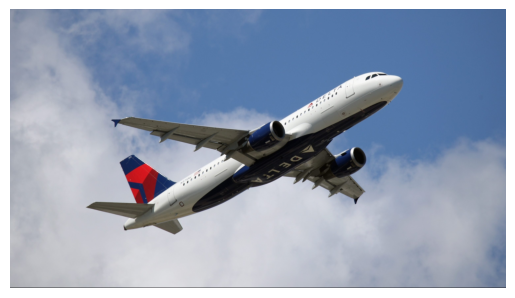

In [5]:
# Загружаем картинку и распечатываем
# !wget https://www.nxsttv.com/nmw/wp-content/uploads/sites/107/2021/06/DeltaPlaneGettyImages-1170328686-e1623504953879.jpg -q -O input.jpg
im = cv2.imread("./input.jpg")
plt.imshow(im[:, :, ::-1])  # BlueGreenRed -> RedGreenBlue (=torch.permute)
plt.axis("off")

### Сегментация

#### MASK RCNN R-50 & Faster RCNN R101C4

In [6]:
# Используем дефолтный конфиг
cfg = get_cfg()

# Репозиторий: https://github.com/facebookresearch/detectron2/tree/main

# Пути к моделям
det_model = "COCO-Detection/faster_rcnn_R_101_C4_3x.yaml"
seg_model = "COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml"

# Загружаем конфиг для модели MASK RCNN R 50
# COCO-InstanceSegmentation/mask_rcnn_R_50_DC5_3x.yaml
cfg.merge_from_file(model_zoo.get_config_file(seg_model))

# Устанавливаем порог для детекции: если уровень
# доверия меньше порога, детекция не состоится
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.8
# Загружаем веса модели модель
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url(seg_model)
# Создаем объект предиктора – он универсальный для моделей
predictor = DefaultPredictor(cfg)

# Передаем в объект загруженное выше изображение
outputs = predictor(im)

[09/17 12:05:44 d2.checkpoint.detection_checkpoint]: [DetectionCheckpointer] Loading from https://dl.fbaipublicfiles.com/detectron2/COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x/137849600/model_final_f10217.pkl ...


/home/dmitry/elbrus/Phase2/ds-phase-2-git/week2/.venv/lib/python3.12/site-packages/torch/functional.py:534: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3595.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


In [7]:
# Outputs – сложный объект, в нем вного всего
outputs["instances"]

Instances(num_instances=1, image_height=1687, image_width=3000, fields=[pred_boxes: Boxes(tensor([[ 529.5328,  385.9832, 2385.9766, 1352.5323]], device='cuda:0')), scores: tensor([0.9979], device='cuda:0'), pred_classes: tensor([4], device='cuda:0'), pred_masks: tensor([[[False, False, False,  ..., False, False, False],
         [False, False, False,  ..., False, False, False],
         [False, False, False,  ..., False, False, False],
         ...,
         [False, False, False,  ..., False, False, False],
         [False, False, False,  ..., False, False, False],
         [False, False, False,  ..., False, False, False]]], device='cuda:0')])

In [8]:
# Например – скоры по обнаруженным объектам
outputs["instances"]

Instances(num_instances=1, image_height=1687, image_width=3000, fields=[pred_boxes: Boxes(tensor([[ 529.5328,  385.9832, 2385.9766, 1352.5323]], device='cuda:0')), scores: tensor([0.9979], device='cuda:0'), pred_classes: tensor([4], device='cuda:0'), pred_masks: tensor([[[False, False, False,  ..., False, False, False],
         [False, False, False,  ..., False, False, False],
         [False, False, False,  ..., False, False, False],
         ...,
         [False, False, False,  ..., False, False, False],
         [False, False, False,  ..., False, False, False],
         [False, False, False,  ..., False, False, False]]], device='cuda:0')])

In [9]:
# Откуда модель знает классы? Потому что предобучена на датасете COCO
# Посмотреть на него можно тут https://cocodataset.org/#explore
# это можно проверить вот так:
cfg.DATASETS.TRAIN

('coco_2017_train',)

In [10]:
MetadataCatalog.get(cfg.DATASETS.TRAIN[0])

namespace(name='coco_2017_train',
          json_file='datasets/coco/annotations/instances_train2017.json',
          image_root='datasets/coco/train2017',
          evaluator_type='coco',
          thing_dataset_id_to_contiguous_id={1: 0,
                                             2: 1,
                                             3: 2,
                                             4: 3,
                                             5: 4,
                                             6: 5,
                                             7: 6,
                                             8: 7,
                                             9: 8,
                                             10: 9,
                                             11: 10,
                                             13: 11,
                                             14: 12,
                                             15: 13,
                                             16: 14,
                                   

In [11]:
# Визуализируем
v = Visualizer(
    im[:, :, ::-1],  # меняем каналы местами. (как torch.permute)
    MetadataCatalog.get(cfg.DATASETS.TRAIN[0]),
    scale=0.2,  # масшатаб картинки
)
out = v.draw_instance_predictions(outputs["instances"].to("cpu"))
out.get_image()

array([[[135, 143, 162],
        [137, 145, 164],
        [136, 144, 163],
        ...,
        [ 70, 102, 149],
        [ 70, 102, 149],
        [ 71, 103, 150]],

       [[138, 145, 164],
        [138, 145, 164],
        [141, 148, 167],
        ...,
        [ 71, 103, 150],
        [ 72, 104, 151],
        [ 70, 104, 150]],

       [[139, 148, 165],
        [142, 149, 167],
        [143, 148, 167],
        ...,
        [ 72, 103, 150],
        [ 72, 103, 150],
        [ 72, 104, 151]],

       ...,

       [[172, 173, 178],
        [172, 173, 178],
        [173, 174, 179],
        ...,
        [117, 131, 157],
        [115, 129, 155],
        [112, 128, 153]],

       [[173, 172, 180],
        [172, 173, 178],
        [174, 173, 181],
        ...,
        [115, 129, 155],
        [115, 129, 155],
        [111, 127, 153]],

       [[169, 170, 175],
        [169, 170, 174],
        [169, 170, 175],
        ...,
        [121, 128, 144],
        [119, 127, 140],
        [119, 126, 142]]

### Обучение на своих данных

In [ ]:
### Установка и загрузка датасета
!pip -q install -U roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="OpgqfxzHLNPUBuepRQpy")
project = rf.workspace("workspace-zy1aq").project("golden-segment")
version = project.version(2)

# Скачаем в COCO Segmentation
dataset = version.download("coco-segmentation", location="/content/golden-segment-2", overwrite=True)
print("DATASET LOCATION:", dataset.location)

!ls -lah /content/golden-segment-2
!find /content/golden-segment-2 -maxdepth 2 -name "_annotations.coco.json"

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.7/88.7 kB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 15.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 53.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 75.3 MB/s eta 0:00:00
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to /content/golden-segment-2 in coco-segmentation:: 100%|██████████| 45/45 [00:00<00:00, 4129.79it/s]


DATASET LOCATION: /content/golden-segment-2
total 28K
drwxr-xr-x 5 root root 4.0K Sep 16 21:30 .
drwxr-xr-x 1 root root 4.0K Sep 16 21:30 ..
-rw-r--r-- 1 root root  147 Sep 16 21:30 README.dataset.txt
-rw-r--r-- 1 root root 1.1K Sep 16 21:30 README.roboflow.txt
drwxr-xr-x 2 root root 4.0K Sep 16 21:30 test
drwxr-xr-x 2 root root 4.0K Sep 16 21:30 train
drwxr-xr-x 2 root root 4.0K Sep 16 21:30 valid
/content/golden-segment-2/train/_annotations.coco.json
/content/golden-segment-2/valid/_annotations.coco.json
/content/golden-segment-2/test/_annotations.coco.json


In [ ]:
### Регистрация датасетов
from pathlib import Path
from detectron2.data import DatasetCatalog, MetadataCatalog
from detectron2.data.datasets import register_coco_instances

base = Path(dataset.location)

# Сначала очистим старые регистрации
for name in ["dogs_train", "dogs_valid", "dogs_test"]:
    if name in DatasetCatalog.list():
        DatasetCatalog.remove(name)

# Регистрируем только те сплиты, которые реально есть
for split in ["train", "valid", "test"]:
    ann = base / split / "_annotations.coco.json"
    img = base / split
    if ann.is_file() and img.is_dir():
        register_coco_instances(f"dogs_{split}", {}, str(ann), str(img))
        print(f"✔ зарегистрирован: dogs_{split}")
    else:
        print(f"⚠ пропущен: {split}")

dogs_train_meta = MetadataCatalog.get("dogs_train")
dogs_train_data = DatasetCatalog.get("dogs_train")
dogs_valid_meta = MetadataCatalog.get("dogs_valid")
dogs_valid_data = DatasetCatalog.get("dogs_valid")

print("Классы:", dogs_train_meta.thing_classes)
print("Mapping:", dogs_train_meta.thing_dataset_id_to_contiguous_id)

✔ зарегистрирован: dogs_train
✔ зарегистрирован: dogs_valid
✔ зарегистрирован: dogs_test
WARNING [09/16 21:30:44 d2.data.datasets.coco]: 
Category ids in annotations are not in [1, #categories]! We'll apply a mapping for you.

[09/16 21:30:44 d2.data.datasets.coco]: Loaded 33 images in COCO format from /content/golden-segment-2/train/_annotations.coco.json
WARNING [09/16 21:30:44 d2.data.datasets.coco]: 
Category ids in annotations are not in [1, #categories]! We'll apply a mapping for you.

[09/16 21:30:44 d2.data.datasets.coco]: Loaded 3 images in COCO format from /content/golden-segment-2/valid/_annotations.coco.json
Классы: ['dogs-s9Cc', 'dog']
Mapping: {0: 0, 1: 1}


In [ ]:
### Обучение модели
import os, cv2, random
import torch
from detectron2.engine import DefaultTrainer, DefaultPredictor
from detectron2.config import get_cfg
from detectron2 import model_zoo
from detectron2.utils.visualizer import Visualizer
import matplotlib.pyplot as plt

yaml_path = "COCO-InstanceSegmentation/mask_rcnn_R_101_C4_3x.yaml"

cfg = get_cfg()
cfg.merge_from_file(model_zoo.get_config_file(yaml_path))
cfg.DATASETS.TRAIN = ("dogs_train",)
cfg.DATASETS.TEST = ("dogs_valid",)
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url(yaml_path)
cfg.SOLVER.IMS_PER_BATCH = 8
cfg.SOLVER.BASE_LR = 0.0025
cfg.SOLVER.MAX_ITER = 30
cfg.MODEL.ROI_HEADS.BATCH_SIZE_PER_IMAGE = 4
cfg.MODEL.ROI_HEADS.NUM_CLASSES = len(dogs_train_meta.thing_classes)

os.makedirs(cfg.OUTPUT_DIR, exist_ok=True)

trainer = DefaultTrainer(cfg)
trainer.resume_or_load(resume=False)
trainer.train()

[09/16 21:32:45 d2.engine.defaults]: Model:
GeneralizedRCNN(
  (backbone): ResNet(
    (stem): BasicStem(
      (conv1): Conv2d(
        3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False
        (norm): FrozenBatchNorm2d(num_features=64, eps=1e-05)
      )
    )
    (res2): Sequential(
      (0): BottleneckBlock(
        (shortcut): Conv2d(
          64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False
          (norm): FrozenBatchNorm2d(num_features=256, eps=1e-05)
        )
        (conv1): Conv2d(
          64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False
          (norm): FrozenBatchNorm2d(num_features=64, eps=1e-05)
        )
        (conv2): Conv2d(
          64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False
          (norm): FrozenBatchNorm2d(num_features=64, eps=1e-05)
        )
        (conv3): Conv2d(
          64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False
          (norm): FrozenBatchNorm2d(num_features=256, eps=1e-05)
 

This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
roi_heads.box_predictor.bbox_pred.{bias, weight}
roi_heads.box_predictor.cls_score.{bias, weight}
roi_heads.mask_head.predictor.{bias, weight}


[09/16 21:32:45 d2.engine.train_loop]: Starting training from iteration 0
[09/16 21:33:14 d2.utils.events]:  eta: 0:00:14  iter: 19  total_loss: 1.673  loss_cls: 0.3109  loss_box_reg: 0.8883  loss_mask: 0.4892  loss_rpn_cls: 0.009119  loss_rpn_loc: 0.05733    time: 1.3737  last_time: 1.2694  data_time: 0.1195  last_data_time: 0.0715   lr: 0.0015842  max_mem: 9949M
[09/16 21:33:29 d2.utils.events]:  eta: 0:00:00  iter: 29  total_loss: 1.02  loss_cls: 0.05256  loss_box_reg: 0.7653  loss_mask: 0.1477  loss_rpn_cls: 0.004413  loss_rpn_loc: 0.04698    time: 1.3795  last_time: 1.4143  data_time: 0.0752  last_data_time: 0.0794   lr: 0.0024168  max_mem: 9949M
[09/16 21:33:29 d2.engine.hooks]: Overall training speed: 28 iterations in 0:00:38 (1.3796 s / it)
[09/16 21:33:29 d2.engine.hooks]: Total training time: 0:00:40 (0:00:02 on hooks)
WARNING [09/16 21:33:29 d2.data.datasets.coco]: 
Category ids in annotations are not in [1, #categories]! We'll apply a mapping for you.

[09/16 21:33:29 d2.da

This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.


[09/16 21:33:31 d2.checkpoint.detection_checkpoint]: [DetectionCheckpointer] Loading from ./output/model_final.pth ...


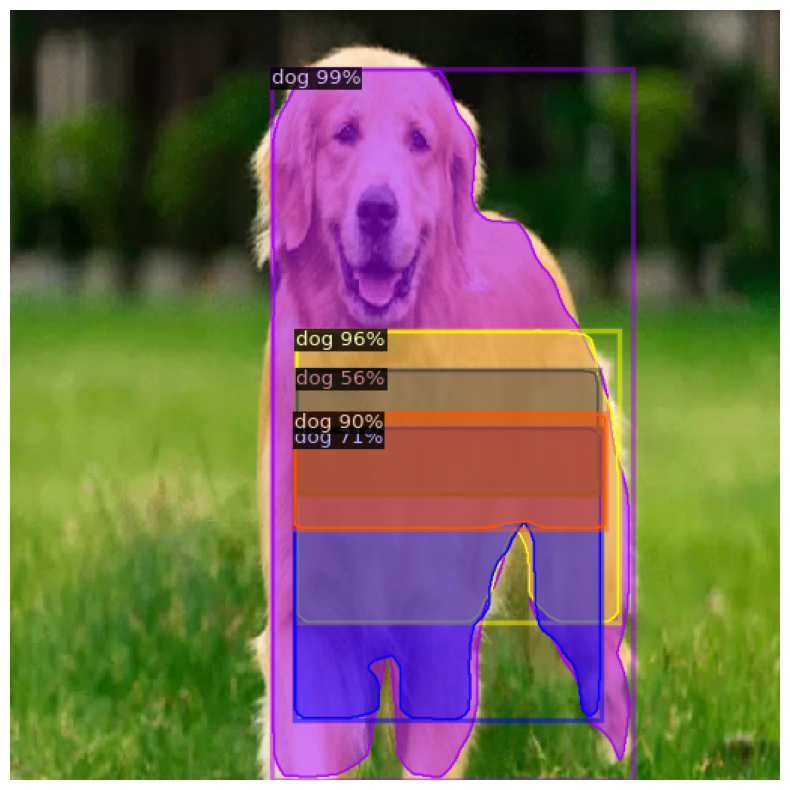

In [ ]:
### Инференс на картинке
cfg.MODEL.WEIGHTS = os.path.join(cfg.OUTPUT_DIR, "model_final.pth")
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5
predictor = DefaultPredictor(cfg)

# Подставь путь к реальной картинке из test
im = cv2.imread(str(base / "test" / os.listdir(base / "test")[0]))
outputs = predictor(im)

v = Visualizer(im[:, :, ::-1], metadata=dogs_train_meta, scale=0.8)
out = v.draw_instance_predictions(outputs["instances"].to("cpu"))

plt.figure(figsize=(10, 10))
plt.imshow(out.get_image())
plt.axis("off")
plt.show()

In [ ]:
### Валидация и метрики (если есть test)
from detectron2.data import build_detection_test_loader
from detectron2.evaluation import COCOEvaluator, inference_on_dataset

if "dogs_test" in DatasetCatalog.list():
    evaluator = COCOEvaluator("dogs_test", cfg, False, output_dir=cfg.OUTPUT_DIR)
    val_loader = build_detection_test_loader(cfg, "dogs_test")
    inference_on_dataset(predictor.model, val_loader, evaluator)
else:
    print("⚠ Нет test-сплита, метрики не посчитаны")

WARNING [09/16 21:33:32 d2.evaluation.coco_evaluation]: COCO Evaluator instantiated using config, this is deprecated behavior. Please pass in explicit arguments instead.
WARNING [09/16 21:33:32 d2.data.datasets.coco]: 
Category ids in annotations are not in [1, #categories]! We'll apply a mapping for you.

[09/16 21:33:32 d2.data.datasets.coco]: Loaded 1 images in COCO format from /content/golden-segment-2/test/_annotations.coco.json
[09/16 21:33:32 d2.data.build]: Distribution of instances among all 2 categories:
|  category  | #instances   |  category  | #instances   |
|:----------:|:-------------|:----------:|:-------------|
| dogs-s9Cc  | 0            |    dog     | 1            |
|            |              |            |              |
|   total    | 1            |            |              |
[09/16 21:33:32 d2.data.dataset_mapper]: [DatasetMapper] Augmentations used in inference: [ResizeShortestEdge(short_edge_length=(800, 800), max_size=1333, sample_style='choice')]
[09/16 21:3

This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.


[09/16 21:33:33 d2.evaluation.evaluator]: Inference done 1/1. Dataloading: 0.0000 s/iter. Inference: 0.4457 s/iter. Eval: 0.0109 s/iter. Total: 0.4566 s/iter. ETA=0:00:00
[09/16 21:33:33 d2.evaluation.evaluator]: Total inference time: 0:00:00.654958 (0.654958 s / iter per device, on 1 devices)
[09/16 21:33:33 d2.evaluation.evaluator]: Total inference pure compute time: 0:00:00 (0.445705 s / iter per device, on 1 devices)
[09/16 21:33:33 d2.evaluation.coco_evaluation]: Preparing results for COCO format ...
[09/16 21:33:33 d2.evaluation.coco_evaluation]: Saving results to ./output/coco_instances_results.json
[09/16 21:33:33 d2.evaluation.coco_evaluation]: Evaluating predictions with unofficial COCO API...
Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
[09/16 21:33:33 d2.evaluation.fast_eval_api]: Evaluate annotation type *bbox*
[09/16 21:33:33 d2.evaluation.fast_eval_api]: COCOeval_opt.evaluate() finished in 0.00 seconds.
[09/16 21:33:33 d2.evaluation.fa